# Cryptocurrency Clusters

In [108]:
%matplotlib inline

In [39]:
#import dependencies
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Preparation

In [2]:
#read data in using pandas
df = pd.read_csv('Resources/crypto_data.csv')
df.head(10)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
#Discard all cryptocurrencies that are not being traded.In other words, filter for currencies that are currently being traded. 
myfilter = (df['IsTrading'] == True)
trading_df = df.loc[myfilter]
trading_df = trading_df.drop('IsTrading', axis = 1)
trading_df
#Once you have done this, drop the IsTrading column from the dataframe.

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
#Remove all rows that have at least one null value.
trading_df.dropna(how = 'any', inplace = True)
trading_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [16]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
myfilter2 = (trading_df['TotalCoinsMined'] >0)
final_df = trading_df.loc[myfilter2]
final_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
#In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 
#Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
CoinName = final_df['CoinName']
Ticker = final_df['Unnamed: 0']
final_df = final_df.drop(['Unnamed: 0','CoinName'], axis = 1)
final_df 

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [19]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
#To accomplish this task, use Pandas to create dummy variables. 
final_df['TotalCoinSupply'] = final_df['TotalCoinSupply'].astype(float)


In [21]:
final_df = pd.get_dummies(final_df)
final_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the number of rows and columns of your dataset now. How did they change?

There were 71 unique algorithms and 25 unique prooftypes so now we have 98 features in the dataset which is quite large. 

In [103]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaled_data = StandardScaler().fit_transform(final_df)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

# Dimensionality Reduction 

Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance.

For this project, preserve 90% of the explained variance in dimensionality reduction. 
#How did the number of the features change?

In [31]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(.90)

# Get two principal components for the iris data.
data_pca = pca.fit_transform(scaled_data)

In [32]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [33]:
#df with the principal components (columns)
pd.DataFrame(data_pca)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-6.043801e-12,1.847309e-14,1.013369e-14,-0.007129,-1.319756,-0.051813,...,-1.523781e-15,-5.336760e-16,7.906588e-16,3.218293e-15,-4.674668e-15,-7.825794e-16,1.363859e-15,2.858703e-15,-2.410108e-16,-4.341724e-15
1,-0.318434,1.032331,-0.591126,0.001386,-5.993534e-12,1.845979e-14,1.022985e-14,-0.007739,-1.322514,-0.056674,...,-9.840058e-16,-3.670994e-16,1.710884e-16,3.208190e-15,-3.690593e-15,-9.337966e-16,2.022526e-15,3.108727e-15,-1.820982e-16,-4.487191e-15
2,2.305468,1.656383,-0.683617,0.004731,-2.061981e-11,3.468456e-14,3.538716e-14,-0.054781,-1.542879,-0.943951,...,4.230010e-14,3.921414e-14,-7.603124e-14,-5.186800e-14,1.410528e-13,-1.020653e-14,5.695893e-14,-2.763726e-14,7.715989e-14,-5.480311e-14
3,-0.145184,-1.320593,0.192813,-0.001229,5.355326e-12,-7.922184e-15,-6.824363e-15,-0.002071,0.281463,0.251862,...,-8.110501e-15,7.219142e-15,-1.360085e-14,-1.457983e-14,2.084911e-14,-1.254027e-14,-8.306518e-15,7.937065e-15,1.565577e-14,-3.838616e-15
4,-0.151768,-2.036192,0.396182,-0.001705,7.421484e-12,-1.089762e-14,-1.643366e-14,0.027735,0.519099,0.188820,...,-1.611752e-15,6.278242e-14,1.105385e-13,-1.309617e-13,3.676314e-14,-1.173616e-13,-6.286312e-14,4.548241e-15,-7.690028e-14,-1.446637e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,3.616139e-11,3.418891e-14,7.828088e-14,-0.851713,2.041159,3.560713,...,-9.957712e-15,7.803071e-15,-1.361630e-14,-1.708589e-14,2.566867e-14,-1.631244e-14,-9.717869e-15,9.208632e-15,1.674535e-14,-8.212723e-15
528,-0.333144,1.032071,-0.590740,0.001399,-6.053770e-12,1.842233e-14,1.017574e-14,-0.007154,-1.320125,-0.052460,...,-1.330030e-15,-4.439781e-16,5.734223e-16,3.197865e-15,-4.548650e-15,-5.275430e-16,1.209465e-15,3.334370e-15,-2.504701e-16,-4.489620e-15
529,0.324349,-2.312308,0.421515,-0.001319,5.720204e-12,-1.549548e-14,-1.308517e-14,0.017309,0.161077,-0.047787,...,1.117761e-14,2.056396e-14,1.930954e-14,-3.917591e-14,4.927203e-14,-1.139672e-13,7.651775e-13,1.784478e-14,4.554529e-14,-1.326505e-14
530,-0.149364,-2.049336,0.412968,-0.001745,7.582540e-12,-1.638260e-14,-1.732814e-14,0.028954,0.544389,0.233373,...,-1.882994e-15,3.245612e-15,-3.416957e-15,5.372384e-15,-5.378678e-15,5.496354e-15,6.401560e-16,2.389381e-15,4.206407e-15,2.267521e-15


Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [112]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(data_pca)

In [94]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

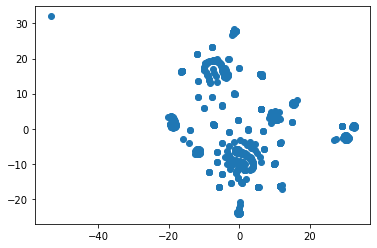

In [95]:
# Prepare to plot the dataset


# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Cluster Analysis with k-Means

Create an elbow plot to identify the best number of clusters. 

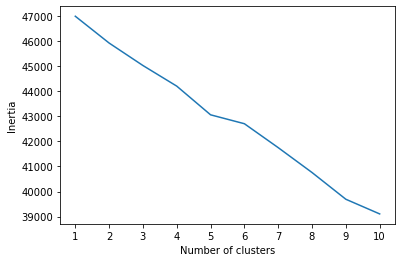

In [130]:
#Use a for-loop to determine the inertia for each k between 1 through 10. 
#Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i)
    km.fit(data_pca)
    inertia.append(km.inertia_)
    
# Define a DataFrame to plot the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

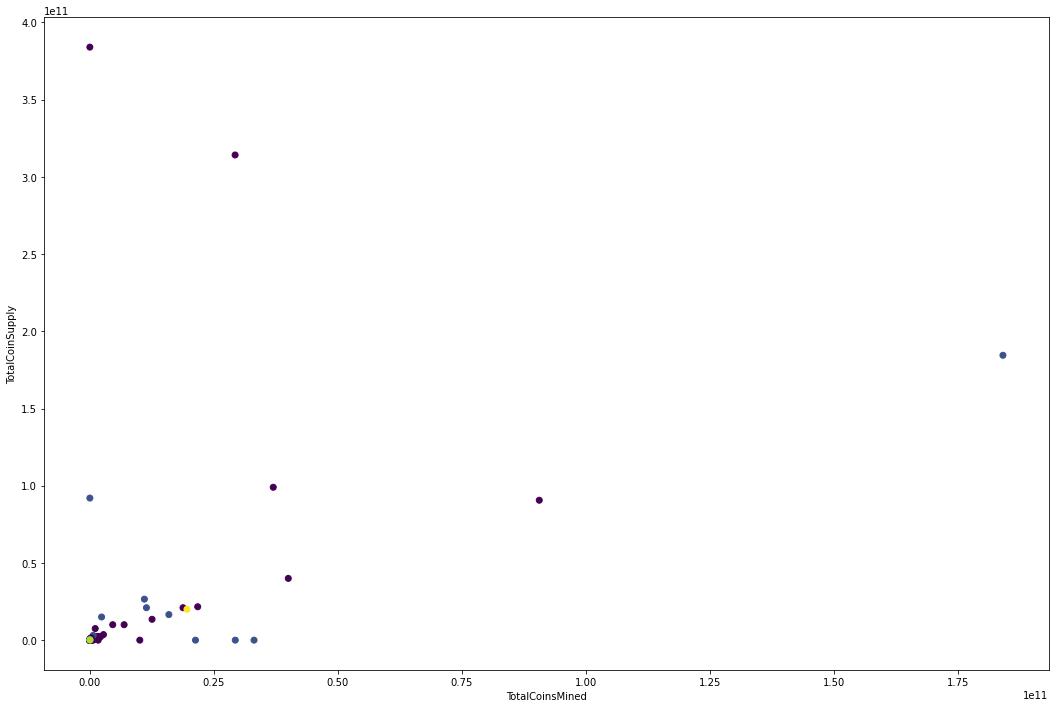

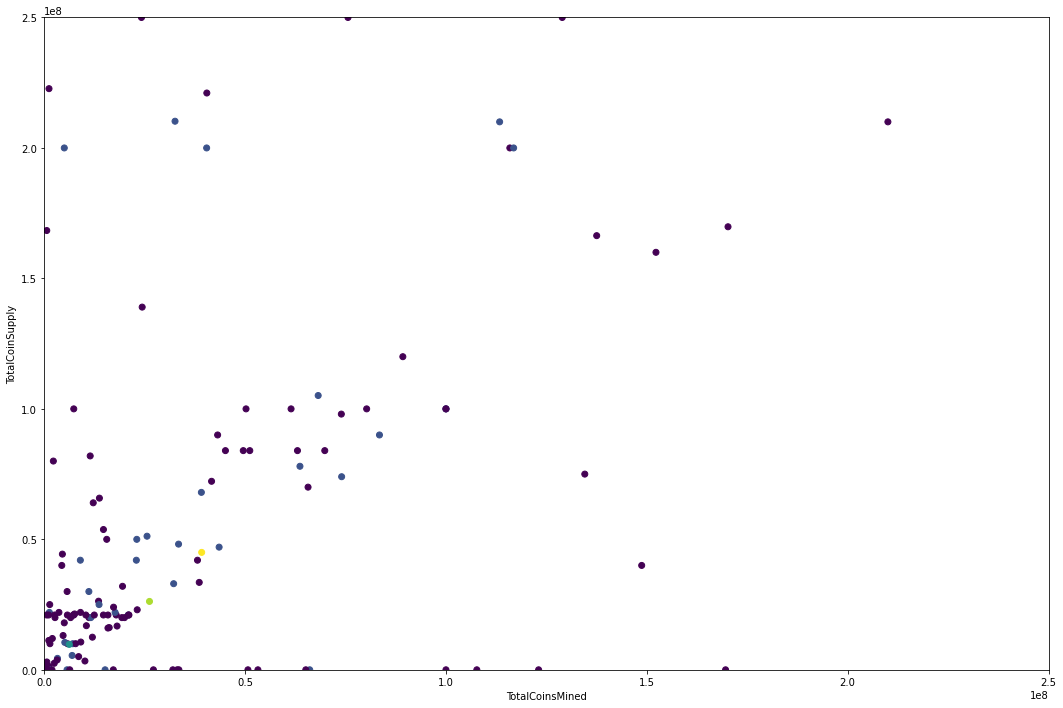

In [135]:
# Initialize the K-Means model
model = KMeans(n_clusters=10, random_state=0)

# Train the model
model.fit(scaled_data)

# Predict clusters
predictions = model.predict(scaled_data)

# Create return DataFrame with predicted clusters
final_df["cluster"] = pd.Series(model.labels_)


plt.figure(figsize = (18,12))
plt.scatter(final_df['TotalCoinsMined'], final_df['TotalCoinSupply'], c=final_df['cluster'])
plt.xlabel('TotalCoinsMined')
plt.ylabel('TotalCoinSupply')
plt.show()

plt.figure(figsize = (18,12))
plt.scatter(final_df['TotalCoinsMined'], final_df['TotalCoinSupply'], c=final_df['cluster'])
plt.xlabel('TotalCoinsMined')
plt.ylabel('TotalCoinSupply')
plt.xlim([0, 250000000])
plt.ylim([0, 250000000])
plt.show()

# Recommendation

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?

Even after running PCA to reduce dimensionality there are still a large number of features in the dataset. This means that there likeley was not much correlation amongst  the features allowing them to be reduced together. The k-means algorithm had a very large inertia and never really leveled off, even at larger #s of clusters making it difficult to determine where an ideal # of clusters might be. In most trials, the k-means algorithm clustered most of the cryptocurrencies together in one big cluster. I would not recommend clustering the cryptocurrencies together in practice, at least not based on these data features. 